In [56]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
import seaborn as sns

from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from pandas.plotting import scatter_matrix

from six.moves import urllib

%matplotlib inline
pd.set_option('display.max_columns',11)

In [57]:
flats_data = pd.read_csv('/Users/dmitry/AI_1/flats_moscow.csv')
flats_data.head()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3


In [19]:
print(f'Total shape {flats_data.shape}')
print(f'All columns: {", ".join(flats_data.columns.values)}')

Total shape (2040, 11)
All columns: Unnamed: 0, price, totsp, livesp, kitsp, dist, metrdist, walk, brick, floor, code


In [21]:
flats_data.describe(include = "all")

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,1020.500000,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,589.041594,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,1.000000,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,510.750000,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,1020.500000,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,1530.250000,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,2040.000000,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000


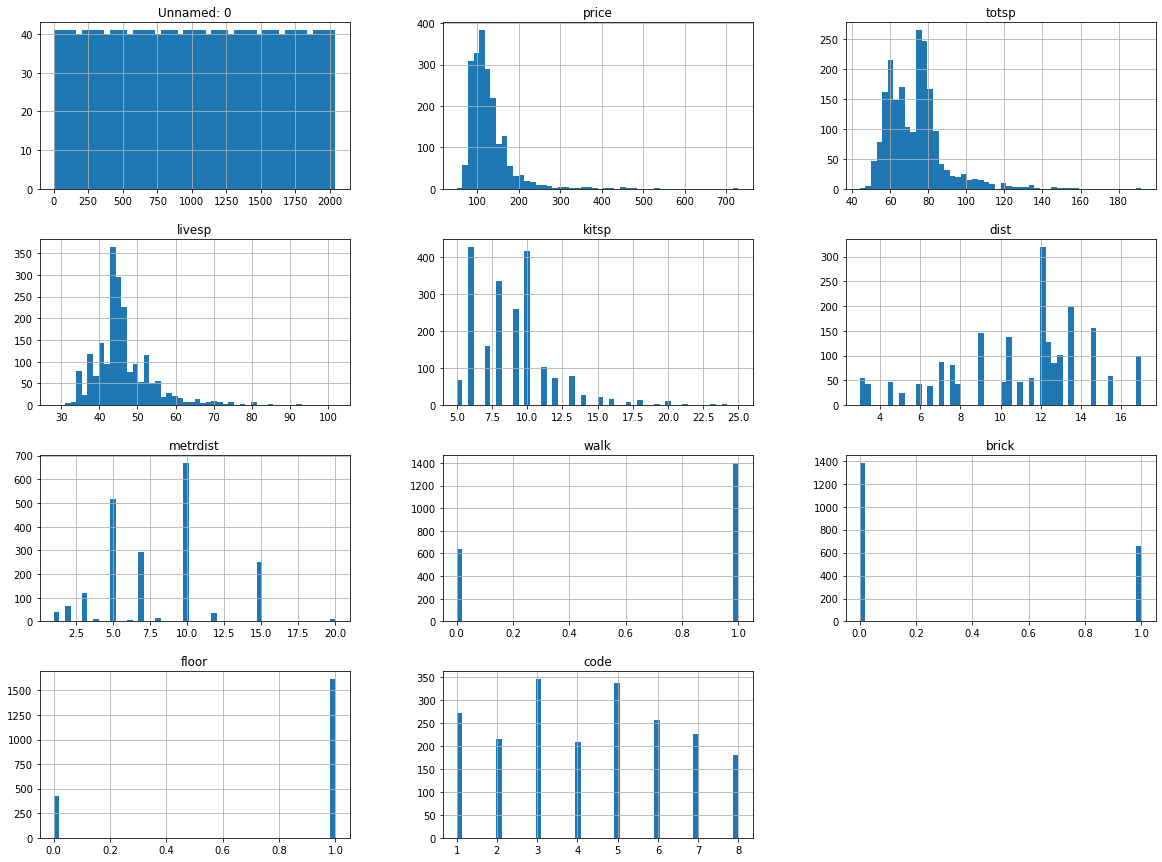

In [26]:
flats_data.hist(bins = 50, figsize = (20, 15))
plt.savefig('./flats.png')
plt.show()

In [29]:
flats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2040 non-null   int64  
 1   price       2040 non-null   int64  
 2   totsp       2040 non-null   int64  
 3   livesp      2040 non-null   int64  
 4   kitsp       2040 non-null   float64
 5   dist        2040 non-null   float64
 6   metrdist    2040 non-null   int64  
 7   walk        2040 non-null   int64  
 8   brick       2040 non-null   int64  
 9   floor       2040 non-null   int64  
 10  code        2040 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 175.4 KB


In [33]:
flats_data['metrdist'].unique()

array([ 7,  3, 10,  5,  1, 15,  8,  2,  4,  6, 20, 12,  9, 11])

In [37]:
target = 'price'
numerical = ['totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'walk', 'brick', 'floor', 'code']

print(f'Target column: {target}')
print(f'Numerical column: {", ".join(numerical)}')

Target column: price
Numerical column: totsp, livesp, kitsp, dist, metrdist, walk, brick, floor, code


In [40]:
scalered = StandardScaler()
scalered.fit(flats_data[numerical])
flats_data[numerical] = scalered.transform(flats_data[numerical])

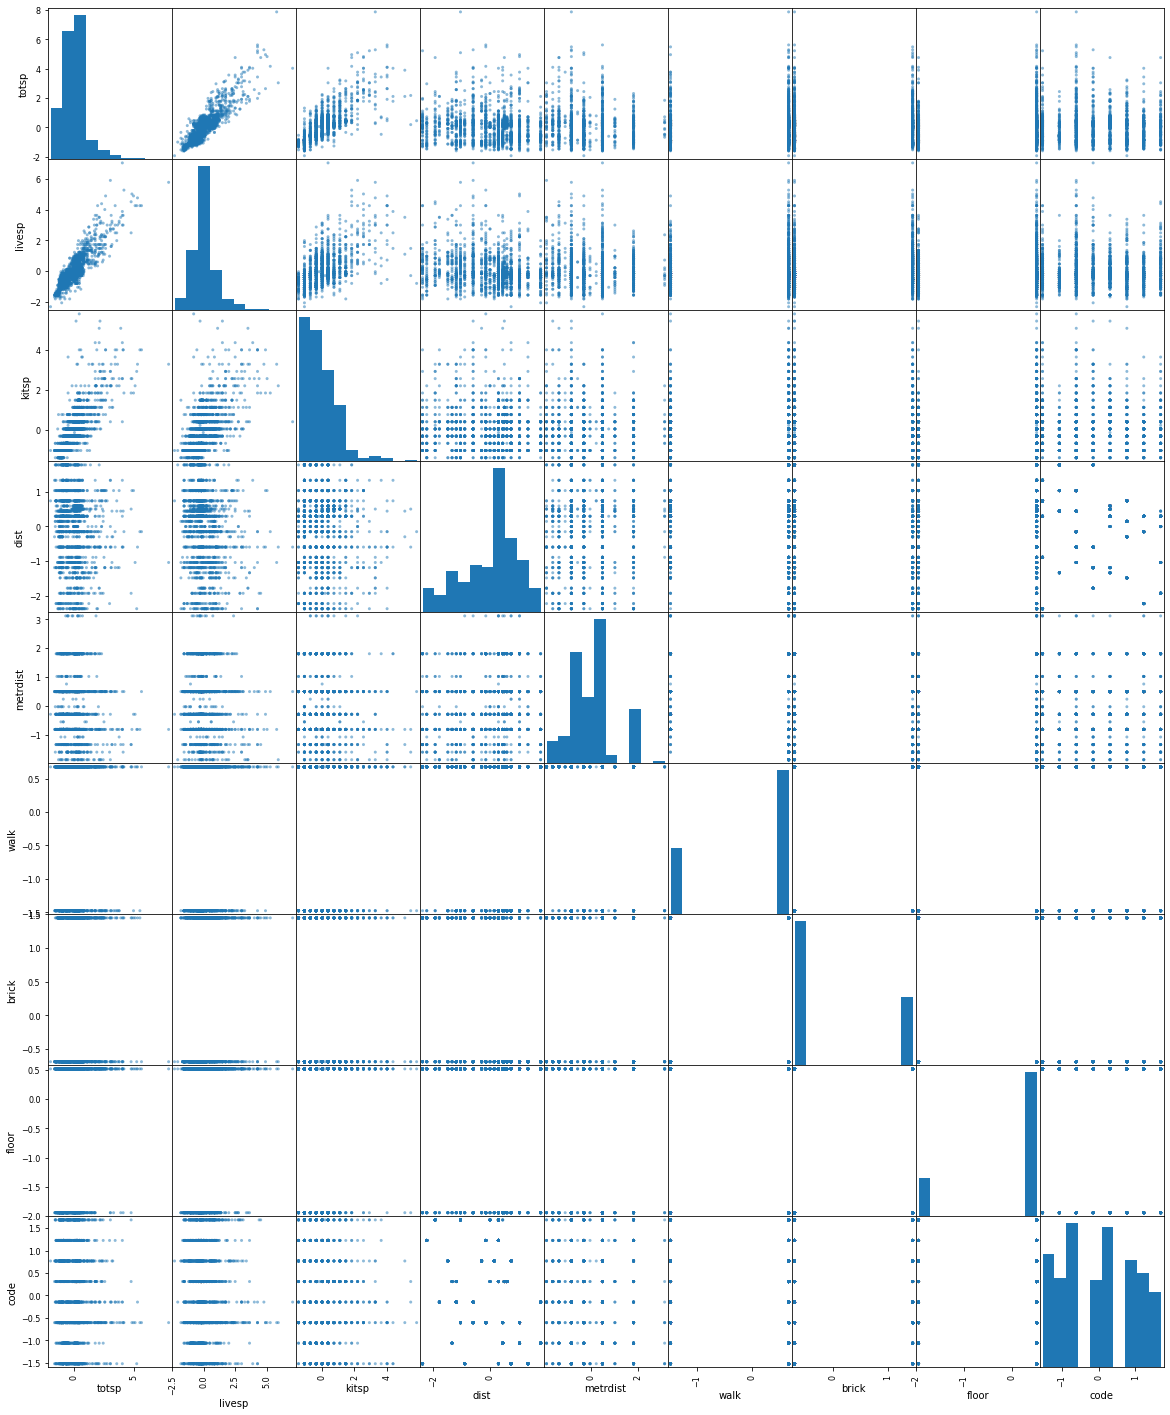

In [43]:
scatter_matrix(flats_data[numerical], figsize = (20,25));

In [45]:
print(len(numerical))
print(numerical)

9
['totsp', 'livesp', 'kitsp', 'dist', 'metrdist', 'walk', 'brick', 'floor', 'code']


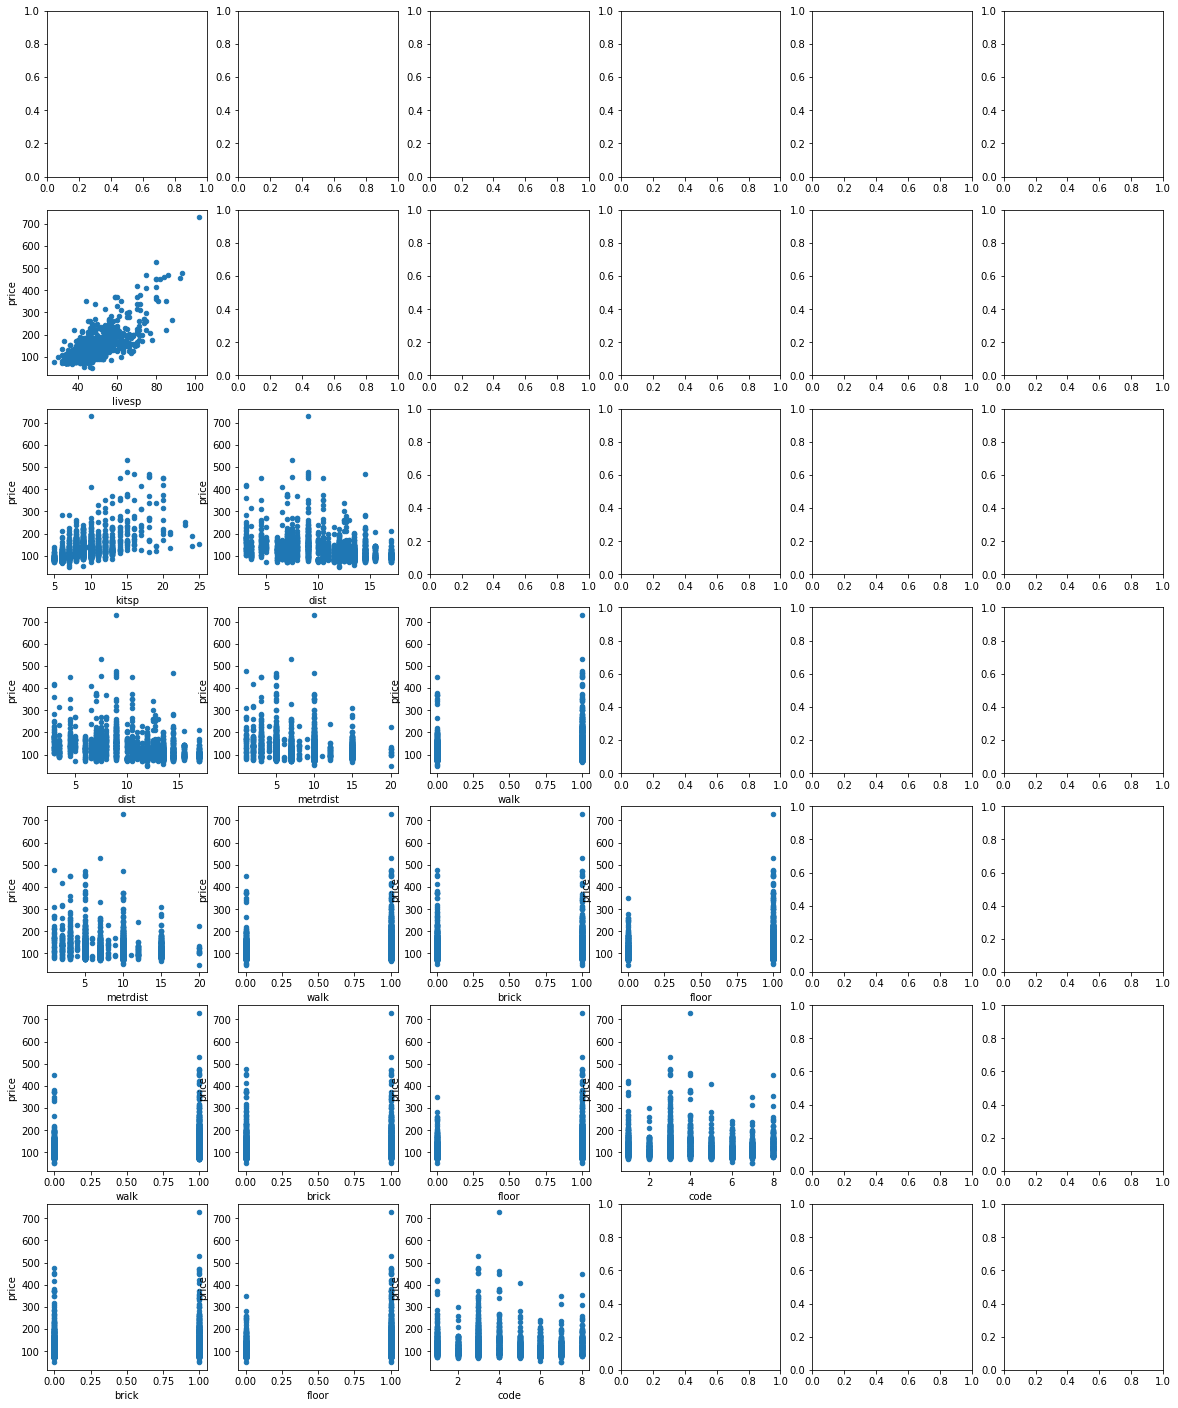

In [58]:
plot_arr = numerical
nrows = 7
ncols = 6

fig, axs = plt.subplots(ncols = ncols, nrows = nrows, figsize = (20,25))
for i in range(nrows):
    for j in range(i):
        if i > ncols:
            break
        if i+j >= len(plot_arr):
            continue
        column = plot_arr[i+j]
        flats_data.plot.scatter(x = column, y=target, ax=axs[i][j])
fig.savefig('./flats_numerical_depend.png')
plt.show()

In [61]:
corr_matrix = flats_data.corr()
corr_matrix[target].sort_values(ascending = False)

price         1.000000
totsp         0.756042
livesp        0.729614
kitsp         0.597235
brick         0.260835
walk          0.151996
floor         0.132564
Unnamed: 0   -0.022761
code         -0.089623
metrdist     -0.152116
dist         -0.331563
Name: price, dtype: float64

In [60]:
flats_data.describe(include = "all")

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,1020.500000,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686,4.322059
std,589.041594,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918,2.183289
min,1.000000,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,510.750000,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000,3.000000
50%,1020.500000,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000,4.000000
75%,1530.250000,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000,6.000000
max,2040.000000,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000,8.000000
